<a href="https://colab.research.google.com/github/bashtavenko/colabs/blob/updates/linear_algebra_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear algebra basics

In [2]:
#@title Common imports
import numpy as np
import matplotlib.pyplot as plt


# Vectors

In [ ]:
v = np.array([1, 1])
w = np.array([2, 3])

In [ ]:
# Linear combination
print(3*v + 5*w)

# Dot product
v = np.array([1, 2])
w = np.array([4, 5])
print(np.dot(v, w))

# Length (norm or magnitude)
v = np.array([1, 3, 2])
print(np.linalg.norm(v))

# Unit vector
print(v/np.linalg.norm(v))

# Angle between vectors
v = np.array([1, 0])
w = np.array([1, 1])
# 45 degrees
print(np.rad2deg(np.arccos(np.dot(v, w)/(np.linalg.norm(v)*np.linalg.norm(w)))))

[8 5]
14
3.7416573867739413
[0.26726124 0.80178373 0.53452248]
45.00000000000001


# Matrices

In [ ]:
# Dot product
a = np.array([[3, 4], [1, 5], [2, 0]])
b = np.array([[2, 4], [1, 1]])
print (np.dot(a, b))

# Inverse
a = np.array([[2, 3], [4, 7]])
print (np.linalg.inv(a))

[[10 16]
 [ 7  9]
 [ 4  8]]
[[ 3.5 -1.5]
 [-2.   1. ]]


# The Normal equation

In [4]:
#@title From hands-on code ...
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

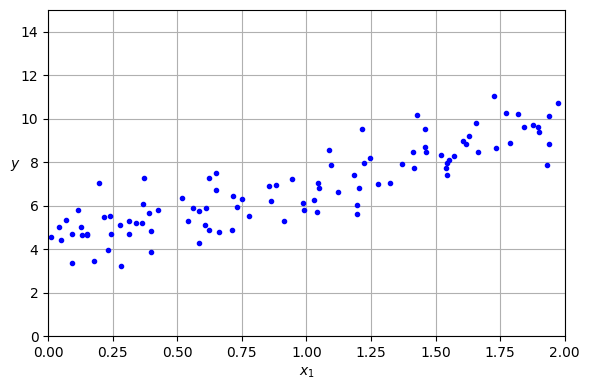

In [6]:
import matplotlib.pyplot as plt

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()
